In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mode

In [14]:
# Осреднение к нескольким значениям
def bin_averaging(data):
    min_data = min(data)
    max_data = max(data)
    # Поиск значений, к которым осредняем данные
    bins = np.logspace(np.log10(min(data)), np.log10(max(data)), num=100)
    key_nums = []
    for i in range(len(bins) - 1):
        number = (bins[i] * bins[i + 1]) ** (1/2)
        key_nums.append(number)
    # Осреднение    
    result = []
    for value in data:
        for i in range(len(bins) - 1):
            if bins[i] <= value < bins[i + 1]:
                result.append(key_nums[i])
    return result

In [23]:
def razdel(file, data):
    X = file['X'].unique()
    Y = file['Y'].unique()

    data_1 = file[(file['X'] <= 500) & (file['Y'] > -50)]
    data_2 = file[(file['X'] <= 500) & (file['Y'] <= -50) & (file['Y'] > -80)]
    data_3 = file[(file['X'] > 500) & (file['X'] <= 1000) & (file['Y'] > -50)]
    data_4 = file[(file['X'] > 500) & (file['X'] <= 1000) & (file['Y'] <= -50) & (file['Y'] > -80)]
    data_5 = file[(file['X'] > 1000) & (file['X'] <= 1500) & (file['Y'] > -50)]
    data_6 = file[(file['X'] > 1000) & (file['X'] <= 1500) & (file['Y'] <= -50) & (file['Y'] > -80)]
    data_7 = file[(file['X'] > 1500) & (file['Y'] > -50)]
    data_8 = file[(file['X'] > 1500) & (file['Y'] <= -50) & (file['Y'] > -80)]
    return [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8]

In [25]:
file = pd.read_excel('pr_2750.xlsx', sheet_name='main')
data = file['OC']
result = razdel(file, data)

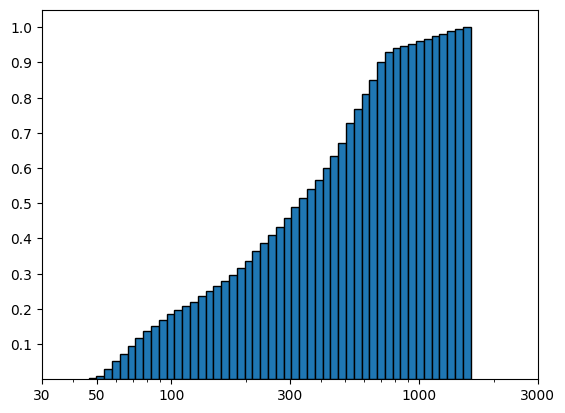

In [22]:
hist_1 = result[0]
main_data = hist_1['OC']
bins = np.logspace(np.log10(min(main_data)), np.log10(max(main_data)), num=50)
# plt.yscale('log')
plt.xscale('log')
plt.hist(hist_1['OC'], bins=bins, cumulative=True, edgecolor='black', density=True)
plt.xticks([30, 50, 100, 300, 1000, 3000], labels=['30', '50', '100', '300', '1000', '3000'])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()


In [ ]:
for i in range(len(result)):
    file_path = 'D:/Learning/pythonich/Работа_с_библиотеками/for_diploma/for_dk.xlsx'
    sheet_name = f"{i+1}"
    with pd.ExcelWriter(file_path, mode='a', if_sheet_exists='replace') as writer:
        result[i].to_excel(writer, sheet_name=sheet_name, index=False)

In [30]:
print(f"Среднее            Медиана           Мода")
for i in range(len(result)):
    moda = mode(bin_averaging(result[i]['OC']))
    print(np.mean(result[i]['OC']), np.median(result[i]['OC']), moda)

Среднее            Медиана           Мода
393.3808733159076 337.651860092445 520.6879134781237
462.8763393536592 460.2431860479 560.7674122901118
93.26500666055583 63.3403397213135 53.57740907882143
393.63107133054234 365.87962946380003 389.7045142323423
450.2710639253892 202.73080938466 60.95023554148358
850.1357306810634 713.78670658309 1647.4973010366261
60.64328721356092 40.362177055692 33.46954449884316
280.7763667097354 265.47591869992 293.00772346405427
